# Investigate mixing processes in accretor models
author: [Mathieu Renzo](mailto:mrenzo@flatironinstitute.org)

In [1]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
%matplotlib inline
from plotDefaults import *
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *

In [2]:
set_plotDefaults()

done in plotDefaults.py


In [3]:
# root folder for best model
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/"
binary = folder+"binary_to_postRLOF/"# "/binary_to_donor_Hedepl/"
accretor = folder+"/accretor_to_TAMS/"
dhfile = binary+"/LOGS1/history.data"
hfile1 = binary+'/LOGS2/history.data'
hfile2 = accretor+'/LOGS/history.data'
bfile = binary+'/binary_history.data'
model_name = folder.split('/')[-2].replace('_','\_')
print(model_name)

# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/exponential_ov/"
# binary = folder+"binary_to_postRLOF/"
# dhfile = binary+"/LOGS1/history.data"
# hfile1 = binary+'/LOGS2/history.data'
LOGS2 = binary+'/LOGS2/'

re-run\_exponential


In [ ]:
# n14 only
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(120, 155)

ax1 = fig.add_subplot(gs[:, :30])
ax2 = fig.add_subplot(gs[:, 30:60])
ax3 = fig.add_subplot(gs[:, 60:90])
ax4 = fig.add_subplot(gs[:, 90:120])
ax5 = fig.add_subplot(gs[:, 120:150])
cax = fig.add_subplot(gs[:, 152:])

axes = [ax1, ax2, ax3, ax4, ax5]
ax1.set_ylabel(r"$X(^{14}\mathrm{N})$")
ax1.text(-1.5, 5e-4,r"$5\times 10^{-4}$",  ha="right", va="center", fontsize=30, transform=ax1.transData)


for ax in axes:
    ax.set_yscale('log')
    ax.set_ylim(ymax=7e-3, ymin=4e-4)
    # ax.set_facecolor('#d8d8d8')
    ax.set_xlim(xmin=0, xmax=23)
    ax.set_xlabel(r"$\mathrm{Mass \ [M_\odot]}$")
    # y_ticks = ax.yaxis.get_major_ticks()
    # y_ticks[-1].label.set_visible(False)

    
    
ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])
ax5.set_yticklabels([])



folders = [
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"]  # best model
    # "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/res_tests/space_res/binary_to_postRLOF/LOGS2/"] # rest test
    # "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/Brott+11_ov/binary_to_postRLOF/LOGS2/"] # Brott+11 overshooting


for folder in folders:
    ax = axes[folders.index(folder)]
    if "single" in folder:
        title = "$\omega/\omega_\mathrm{crit}="+str(folder.split('/')[-3].split('_')[1])+"$"
        profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        profiles = profiles[1:] # the first profile is before CNO equilibrium and can be confusing
        # plot initial uniform composition at ZAMS
        c12zams, n14zams, o16zams = get_ZAMS_abundances(folder+'history.data')
        ax.scatter(np.linspace(0, 20, 1500), [n14zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=0, vmax=11, rasterized=True)
    if "binary" in folder:
        title = "$\mathrm{binary\ accretor}$"
        # ax.axvline(17,0,1, ls="--", c='k', lw=1, zorder=0)
        profiles_bin = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        # profiles_bin = profiles_bin[1:] # the first profile is during the initial relaxation, skip it
        # remove the relaxation and evolution towards CNO equilibrium for clarity
        # profiles_bin = [p for p in profiles_bin if get_age_from_profile(p)>0.2]
        profiles_sin = sorted(glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)
        # plot initial uniform composition at ZAMS
        c12zams, n14zams, o16zams = get_ZAMS_abundances(folder+'history.data')
        ax.scatter(np.linspace(0, 17, 1500), [n14zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=0, vmax=11, rasterized=True)
        # let's plot a bit less for clarity
        profiles = profiles_bin[::5]+profiles_sin[::50]
        profiles = profiles + [profiles_sin[-1]] # make sure to add TAMS profile
        profiles = profiles[8::] # remove profiles before CNO equilibrium
    ax.set_title(title, fontsize=30)
    for profile in profiles: #speed up
        src, col = getSrcCol(profile)
        n = src[:, col.index("n14")]
        m = src[:, col.index("mass")]
        age = get_age_from_profile(profile)
        ax.plot(m, n, c='#808080', lw=1, zorder=0)
        p = ax.scatter(m,n, c=[age]*len(n), s=5, vmin=0, vmax=11, rasterized=True)
        if profile == profiles[-1]:
            ax.axhline(n[0],0,1, ls='--', lw=2, c='r', zorder=100, rasterized=True)       
    n, err_n =  get_zeta_oph_surface_n(X=0.678010)
    ax.axhline(n, 0,1,c='r', lw=2, zorder=0)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 3)
    ax.fill_between(x, y1=n-err_n, y2=n+err_n, fc='r',alpha=0.2, zorder=0)

# highlight last profile of binary run
pfile = profiles_bin[-1]
src, col = getSrcCol(pfile)
n = src[:, col.index("n14")]
m = src[:, col.index("mass")]
age = get_age_from_profile(profile)
ax5.plot(m, n, c='k', lw=2, ls='--', zorder=100)

fig.colorbar(p, cax=cax)
cax.set_ylabel(r"$\mathrm{time \ [Myr]}$")
ax5.axvspan(17, 23, alpha=0.5, color="#808080", zorder=0)

# plt.savefig("/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/n14_struct_complete_zeta_ab.pdf", rasterized=True)


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile41.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile46.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile51.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile56.data


...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile61.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile66.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile71.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile76.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile81.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile86.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile91.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile96.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile101.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist


...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile106.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile111.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise

... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile116.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile121.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile126.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile131.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile136.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile141.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile146.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile151.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile156.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile161.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile166.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile171.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile176.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile181.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile186.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile191.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile196.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile201.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile206.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile211.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile216.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile221.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile226.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile231.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile236.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile241.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile246.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile251.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile256.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile261.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile266.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile271.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile276.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile281.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile286.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile291.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile296.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile301.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile306.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile311.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile316.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile321.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile326.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile331.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile336.data
...    and storing it for you in binary format


...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile341.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile346.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile351.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile356.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile361.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile366.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile371.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile376.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile381.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile386.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile391.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile396.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile401.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile406.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile411.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile416.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile421.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile426.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile431.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile436.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile441.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile446.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile451.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile456.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile461.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile466.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile471.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile476.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile481.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile486.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile491.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile496.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile501.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile506.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile511.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile516.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile521.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile526.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile531.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile536.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile541.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile546.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile551.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile556.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile561.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile566.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile571.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile576.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile581.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile586.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile591.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile596.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile601.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile606.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile611.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile616.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile621.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile626.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile631.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile636.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile641.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile646.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile651.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile656.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile661.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile666.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile671.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile676.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile681.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile686.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile691.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile696.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile701.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile706.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile711.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile716.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist


...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile721.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile726.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile731.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile736.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile741.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile746.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile751.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile756.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile761.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile766.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile771.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile776.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile781.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile786.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile791.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile796.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile801.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile806.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile811.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile816.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile821.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile826.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile831.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile836.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile841.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile846.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile851.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile856.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile861.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile866.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  

/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile871.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile876.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile881.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile886.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile891.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile896.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile901.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile906.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile911.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile916.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile921.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile926.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile931.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile936.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile941.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile946.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile951.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile956.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile961.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile966.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile971.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile976.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile981.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile986.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile991.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile996.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist


...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1001.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1006.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1011.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1016.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1021.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1026.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1031.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1036.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1041.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1046.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1051.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1056.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1061.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1066.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1071.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1076.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1081.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1086.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1091.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1096.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1101.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1106.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1111.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1116.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1121.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1126.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1131.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1136.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1141.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1146.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1151.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1156.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1161.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1166.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1171.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1176.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1181.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1186.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1191.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1196.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1201.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1206.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1211.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1216.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1221.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1226.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1231.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1236.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1241.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1246.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1251.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1256.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1261.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1266.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1271.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1276.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1281.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1286.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1291.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1296.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1301.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1306.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1311.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1316.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1321.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1326.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1331.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1336.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1341.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1346.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1351.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1356.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1361.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1366.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1371.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1376.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1381.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1386.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1391.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1396.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1401.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1406.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1411.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1416.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1421.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1426.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1431.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1436.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1441.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1446.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1451.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1456.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1461.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1466.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1471.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1476.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1481.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1486.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1491.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1496.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1501.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1506.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1511.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1516.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1521.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1526.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1531.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1536.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1541.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1546.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1551.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1556.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1561.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1566.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1571.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1576.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1581.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1586.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1591.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1596.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1601.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1606.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1611.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1616.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1621.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1626.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1631.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1636.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1641.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1646.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1651.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1656.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1661.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1666.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1671.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1676.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1681.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1686.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1691.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1696.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1701.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1706.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1711.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1716.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1721.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1726.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1731.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1736.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1741.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1746.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1751.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1756.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1761.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1766.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1771.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1776.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1781.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1786.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1791.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1796.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1801.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1806.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1811.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1816.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1821.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1826.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1831.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1836.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1841.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1846.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1851.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1856.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1861.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1866.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1871.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1876.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1881.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1886.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1891.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1896.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1901.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1906.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1911.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1916.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1921.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1926.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1931.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1936.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1941.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1946.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1951.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1956.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1961.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1966.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1971.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1976.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1981.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1986.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1991.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile1996.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2001.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2006.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2011.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2016.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2021.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2026.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2031.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2036.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2041.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2046.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2051.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2056.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2061.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2066.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2071.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2076.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2081.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2086.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2091.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2096.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2101.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2106.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2111.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2116.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2121.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2126.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2131.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2136.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2141.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2146.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2151.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2156.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2161.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2166.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2171.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2176.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2181.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2186.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2191.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2196.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2201.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2206.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2211.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2216.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2221.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2226.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2231.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2236.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2241.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2246.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2251.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2256.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2261.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2266.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2271.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2276.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2281.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2286.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2291.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2296.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2301.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2306.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2311.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2316.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2321.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2326.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2331.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2336.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2341.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2346.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2351.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2356.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2361.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2366.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2371.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2376.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2381.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2386.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2391.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2396.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2401.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2406.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2411.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2416.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2421.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2426.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2431.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2436.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2441.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2446.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2451.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2456.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2461.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2466.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2471.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2476.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2481.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2486.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2491.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2496.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2501.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2506.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2511.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2516.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2521.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2526.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2531.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2536.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2541.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2546.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2551.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2556.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2561.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2566.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2571.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2576.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2581.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2586.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2591.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2596.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2601.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2606.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2611.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2616.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2621.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2626.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2631.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2636.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2641.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2646.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2651.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2656.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2661.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2666.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2671.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2676.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2681.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2686.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2691.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2696.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2701.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2706.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2711.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2716.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2721.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2726.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2731.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2736.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2741.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2746.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2751.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2756.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2761.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2766.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2771.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2776.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2781.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2786.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2791.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2796.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2801.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2806.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2811.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2816.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2821.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2826.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2831.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2836.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2841.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2846.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2851.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2856.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2861.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2866.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2871.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2876.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2881.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2886.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2891.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2896.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2901.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2906.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2911.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2916.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2921.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2926.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2931.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2936.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2941.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2946.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2951.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2956.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2961.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2966.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2971.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2976.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2981.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2986.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2991.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile2996.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3001.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3006.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3011.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3016.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3021.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3026.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3031.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3036.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3041.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3046.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3051.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3056.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3061.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3066.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3071.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3076.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3081.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3086.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3091.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3096.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3101.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3106.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3111.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3116.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3121.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3126.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3131.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3136.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3141.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3146.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3151.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3156.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3161.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3166.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3171.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3176.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3181.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3186.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3191.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3196.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3201.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3206.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3211.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3216.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3221.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3226.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist


...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3231.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3236.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3241.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3246.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3251.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3256.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3261.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3266.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3271.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3276.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3281.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3286.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3291.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3296.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3301.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3306.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3311.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3316.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3321.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3326.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3331.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3336.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3341.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3346.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3351.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3356.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3361.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3366.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3371.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3376.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3381.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3386.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3391.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3396.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3401.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3406.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3411.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3416.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3421.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3426.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3431.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3436.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3441.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3446.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3451.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3456.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3461.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3466.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3471.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3476.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3481.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3486.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3491.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3496.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3501.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3506.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3511.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3516.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3521.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3526.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3531.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3536.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3541.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3546.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3551.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3556.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3561.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3566.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3571.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3576.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3581.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3586.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3591.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3596.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3601.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3606.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3611.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3616.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3621.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3626.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3631.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3636.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3641.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3646.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3651.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3656.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3661.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3666.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3671.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3676.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3681.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3686.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3691.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3696.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3701.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3706.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3711.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3716.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3721.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3726.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3731.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3736.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3741.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3746.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3751.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3756.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3761.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3766.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3771.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3776.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3781.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3786.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3791.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3796.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3801.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3806.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3811.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3816.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3821.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3826.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3831.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3836.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3841.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3846.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3851.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3856.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3861.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3866.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3871.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3876.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3881.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3886.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3891.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3896.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3901.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3906.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3911.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3916.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3921.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3926.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3931.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3936.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3941.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3946.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3951.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3956.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3961.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3966.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3971.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3976.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3981.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3986.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3991.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile3996.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4001.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4006.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4011.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4016.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4021.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4026.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4031.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist


...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4036.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  

/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4041.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4046.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4051.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4056.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4061.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4066.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4071.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4076.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4081.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist


...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4086.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4091.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4096.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4101.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4106.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4111.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4116.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4121.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4126.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4131.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4136.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4141.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4146.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4151.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4156.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4161.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4166.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4171.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4176.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4181.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4186.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4191.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4196.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4201.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4206.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4211.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4216.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4221.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4226.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4231.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4236.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4241.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4246.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4251.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4256.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4261.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4266.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4271.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4276.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4281.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4286.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4291.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4296.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4301.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4306.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4311.data
...    and storing it for you in binary format


...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4316.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 


...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4321.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4326.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4331.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4336.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4341.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist


...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4346.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4351.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4356.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4361.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4366.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4371.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist


...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4376.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4381.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4386.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4391.data
...    and storing it for you in binary format


...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4396.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4401.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4406.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4411.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4416.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4421.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4426.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4431.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4436.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4441.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4446.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4451.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 


...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4456.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4461.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4466.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4471.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4476.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4481.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4486.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4491.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4496.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4501.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4506.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4511.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4516.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4521.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4526.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4531.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4536.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4541.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4546.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4551.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4556.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4561.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4566.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4571.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4576.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4581.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4586.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4591.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4596.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4601.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4606.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4611.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4616.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4621.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4626.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist


...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4631.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4636.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4641.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4646.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4651.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4656.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4661.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4666.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4671.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4676.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4681.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4686.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4691.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4696.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4701.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4706.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4711.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4716.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4721.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4726.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4731.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4736.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4741.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4746.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4751.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4756.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4761.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4766.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4771.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4776.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4781.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4786.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4791.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4796.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4801.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4806.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4811.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4816.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4821.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4826.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4831.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4836.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4841.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4846.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4851.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4856.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist


...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4861.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4866.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4871.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4876.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4881.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4886.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4891.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4896.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4901.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4906.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4911.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4916.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4921.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4926.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4931.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4936.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4941.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4946.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4951.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4956.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4961.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4966.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4971.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4976.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4981.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4986.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4991.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile4996.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5001.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5006.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5011.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5016.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5021.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5026.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5031.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5036.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5041.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5046.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5051.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5056.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5061.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5066.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5071.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5076.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5081.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5086.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5091.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5096.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5101.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5106.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5111.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5116.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5121.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5126.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5131.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5136.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5141.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5146.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5151.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5156.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5161.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5166.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5171.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5176.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5181.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5186.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5191.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5196.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5201.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5206.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5211.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5216.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5221.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5226.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5231.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5236.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5241.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5246.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5251.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5256.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5261.data
...    and storing it for you in binary format


...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5266.data
...    and storing it for you in binary format


...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5271.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5276.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5281.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5286.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5291.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5296.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5301.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5306.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5311.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5316.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5321.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5326.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5331.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5336.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5341.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5346.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5351.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5356.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5361.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5366.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5371.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5376.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5381.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5386.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5391.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5396.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5401.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5406.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5411.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5416.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5421.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5426.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5431.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5436.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5441.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5446.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5451.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5456.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5461.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5466.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  

/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5471.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5476.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5481.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5486.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5491.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5496.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5501.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5506.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5511.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5516.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5521.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5526.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5531.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5536.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist


...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5541.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5546.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5551.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5556.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5561.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5566.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5571.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5576.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5581.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5586.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5591.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5596.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5601.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5606.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5611.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5616.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5621.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5626.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5631.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5636.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5641.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5646.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5651.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5656.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5661.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5666.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5671.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5676.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5681.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5686.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5691.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5696.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5701.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5706.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5711.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5716.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5721.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5726.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5731.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5736.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5741.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5746.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5751.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5756.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5761.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5766.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5771.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5776.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5781.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5786.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5791.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5796.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5801.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5806.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5811.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5816.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5821.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5826.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5831.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5836.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5841.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5846.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5851.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file 

 /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5856.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5861.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5866.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5871.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5876.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5881.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5886.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5891.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5896.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist


...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5901.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5906.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5911.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5916.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5921.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5926.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5931.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5936.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5941.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5946.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5951.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5956.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5961.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5966.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5971.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5976.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5981.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5986.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5991.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile5996.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6001.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6006.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6011.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6016.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6021.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6026.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6031.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6036.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6041.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6046.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6051.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6056.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6061.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6066.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6071.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6076.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6081.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise

... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6086.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6091.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6096.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6101.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6106.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6111.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6116.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6121.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6126.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6131.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6136.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6141.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6146.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6151.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6156.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6161.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6166.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6171.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6176.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6181.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6186.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6191.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6196.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6201.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6206.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6211.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6216.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6221.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6226.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6231.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6236.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6241.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6246.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6251.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6256.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6261.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6266.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6271.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6276.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6281.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6286.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6291.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6296.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6301.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6306.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6311.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6316.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6321.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist


...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6326.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6331.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6336.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6341.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6346.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6351.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6356.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6361.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6366.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6371.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6376.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6381.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6386.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6391.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6396.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6401.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6406.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6411.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6416.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6421.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6426.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6431.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6436.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6441.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6446.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6451.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6456.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6461.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6466.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6471.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6476.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6481.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6486.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6491.data
...    and storing it for you in binary format


...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6496.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6501.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6506.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6511.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6516.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6521.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6526.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6531.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6536.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6541.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6546.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6551.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6556.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6561.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6566.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6571.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6576.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6581.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6586.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6591.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6596.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6601.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6606.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6611.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6616.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6621.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6626.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6631.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6636.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6641.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6646.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6651.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6656.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6661.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6666.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6671.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6676.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist


...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6681.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6686.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6691.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6696.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6701.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6706.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6711.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6716.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6721.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6726.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6731.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6736.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6741.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6746.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6751.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6756.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6761.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6766.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6771.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6776.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6781.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6786.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6791.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6796.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6801.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6806.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6811.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6816.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6821.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6826.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6831.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile1.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile51.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile101.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile151.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile201.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile251.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile301.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile351.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile401.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile451.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile501.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile551.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile601.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile651.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile701.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile751.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile801.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile851.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile901.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile951.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile1001.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile1051.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile1101.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile1151.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/../../accretor_to_TAMS/LOGS/profile1184.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise
... Binary file does not yet exist
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/profile6832.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


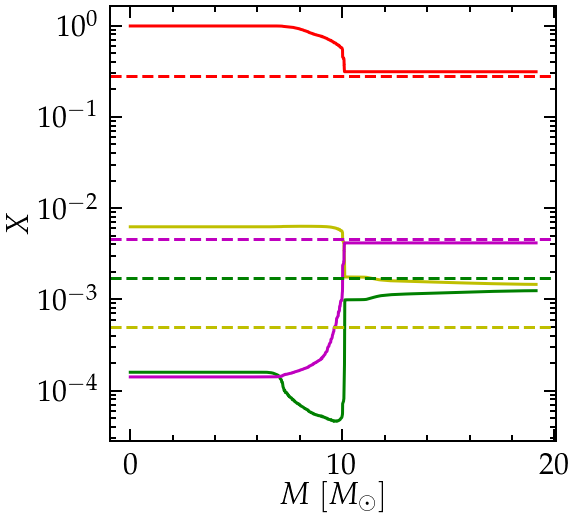

In [8]:
# final He profile
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:, :])
profile = sorted(glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)[-1]
hfile = folder+'/history.data'
src, col = getSrcCol(hfile)
he_init = src[0, col.index("surface_he4")]
c_init = src[0, col.index("surface_c12")]
n_init = src[0, col.index("surface_n14")]
o_init = src[0, col.index("surface_o16")]

src, col = getSrcCol(profile)
he = src[:, col.index("he4")]
c = src[:, col.index("c12")]
o = src[:, col.index("o16")]
n = src[:, col.index("n14")]
m = src[:, col.index("mass")]

ax.plot(m, he, c='r')
ax.plot(m, c, c='g')
ax.plot(m, n, c='y')
ax.plot(m, o, c='m')

ax.set_xlabel(r"$M\ [M_\odot]$")
ax.set_ylabel(r"$X$")

ax.axhline(he_init, 0,1,c='r', ls='--')
ax.axhline(c_init, 0,1,c='g', ls='--')
ax.axhline(o_init, 0,1,c='m', ls='--')
ax.axhline(n_init, 0,1,c='y', ls='--')
# ax.set_ylim(0,1)
ax.set_yscale('log')

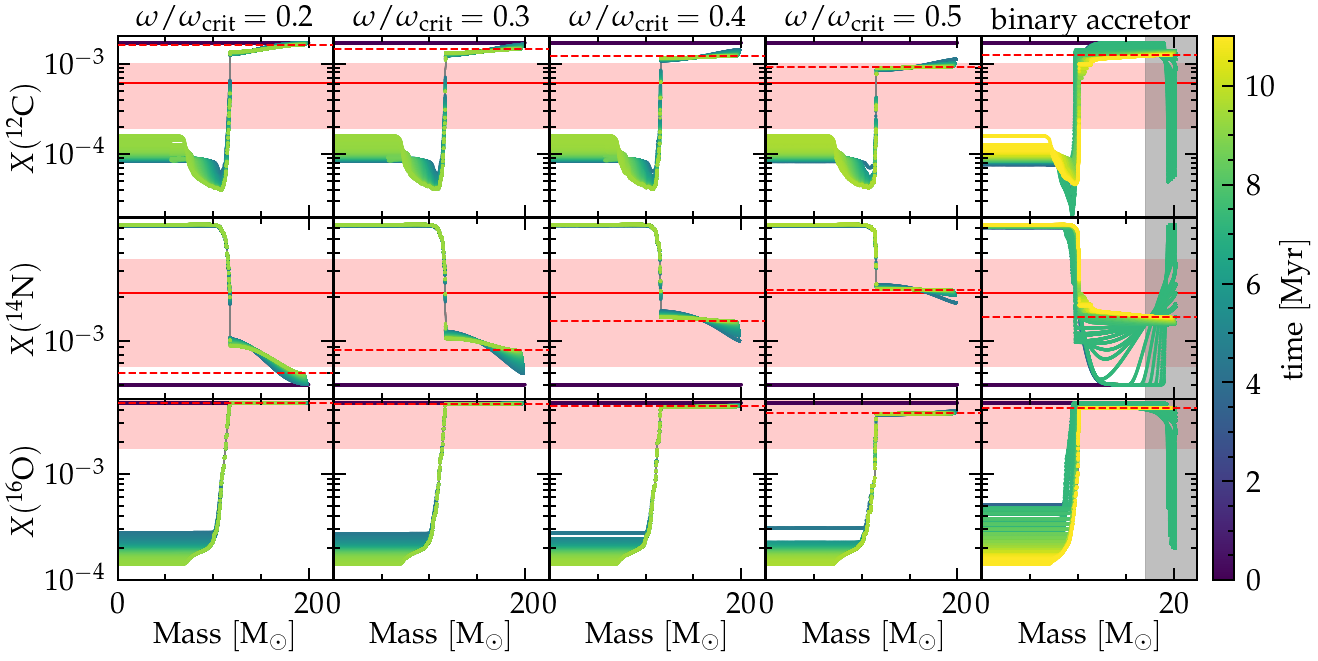

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:168: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


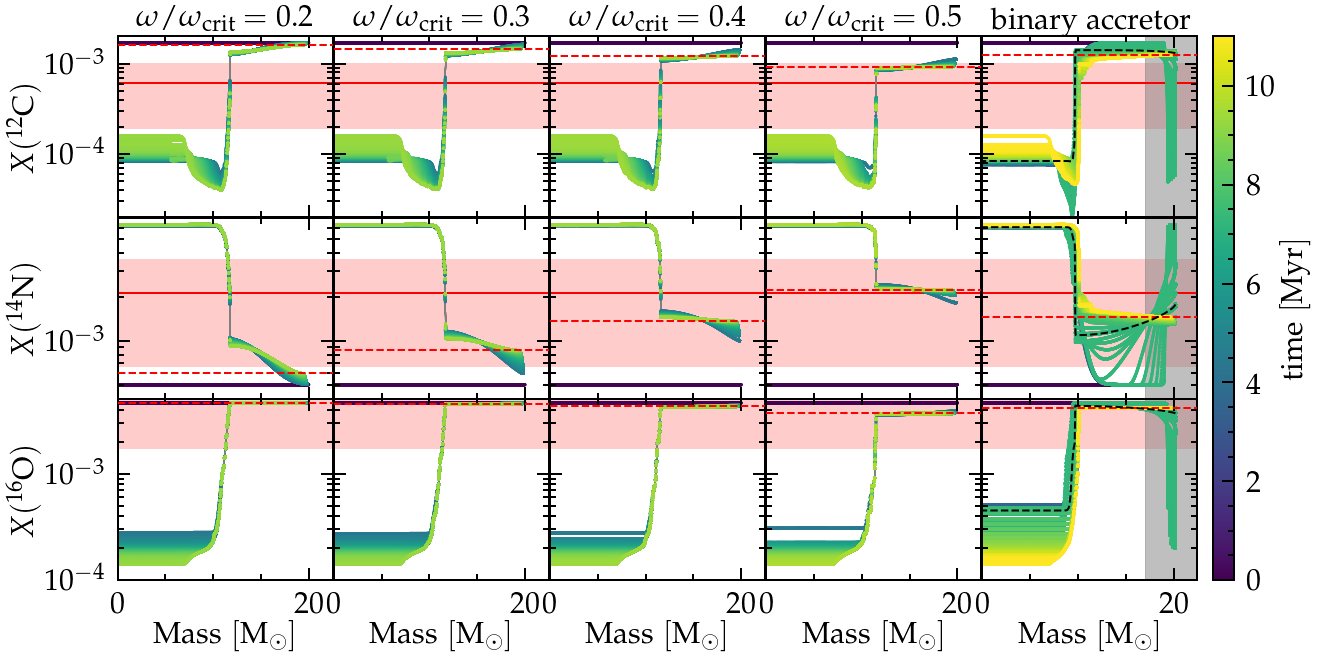

In [40]:
# all rot rate and abundances
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(120, 155)

ax1 = fig.add_subplot(gs[:40, :30])
ax2 = fig.add_subplot(gs[:40, 30:60])
ax3 = fig.add_subplot(gs[:40, 60:90])
ax4 = fig.add_subplot(gs[:40, 90:120])
ax5 = fig.add_subplot(gs[:40, 120:150])

bx1 = fig.add_subplot(gs[40:80, :30])
bx2 = fig.add_subplot(gs[40:80, 30:60])
bx3 = fig.add_subplot(gs[40:80, 60:90])
bx4 = fig.add_subplot(gs[40:80, 90:120])
bx5 = fig.add_subplot(gs[40:80, 120:150])

cx1 = fig.add_subplot(gs[80:120, :30])
cx2 = fig.add_subplot(gs[80:120, 30:60])
cx3 = fig.add_subplot(gs[80:120, 60:90])
cx4 = fig.add_subplot(gs[80:120, 90:120])
cx5 = fig.add_subplot(gs[80:120, 120:150])

cax = fig.add_subplot(gs[:, 152:])

axes = [ax1, ax2, ax3, ax4, ax5]
bxes = [bx1, bx2, bx3, bx4, bx5]
cxes = [cx1, cx2, cx3, cx4, cx5]


ax1.set_ylabel(r"$X(^{12}\mathrm{C})$")
bx1.set_ylabel(r"$X(^{14}\mathrm{N})$")
cx1.set_ylabel(r"$X(^{16}\mathrm{O})$")

for ax in axes:
    ax.set_yscale('log')
    ax.set_ylim(ymax=2e-3, ymin=2e-5)
    ax.set_xlim(xmin=0, xmax=22.5)
    # add observed abundances
    c, err_c =  get_zeta_oph_surface_c()
    ax.axhline(c, 0,1,c='r', lw=2, zorder=0)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax,3)
    ax.fill_between(x, y1=c-err_c, y2=c+err_c, fc='r',alpha=0.2, zorder=0)   
for bx in bxes:
    bx.set_yscale('log')
    bx.set_ylim(ymax=7e-3, ymin=4e-4)
    # bx.set_facecolor('#d8d8d8')
    bx.set_xlim(xmin=0, xmax=22.5)
    # add observed abundances
    n, err_n =  get_zeta_oph_surface_n()
    bx.axhline(n, 0,1,c='r', lw=2, zorder=0)
    xmin, xmax = bx.get_xlim()
    x = np.linspace(xmin, xmax, 3)
    bx.fill_between(x, y1=n-err_n, y2=n+err_n, fc='r',alpha=0.2, zorder=0)
for cx in cxes:
    cx.set_yscale('log')
    cx.set_ylim(ymax=5e-3, ymin=1e-4)
    cx.set_xlim(xmin=0, xmax=22.5)
    cx.set_xlabel(r"$\mathrm{Mass \ [M_\odot]}$")
    # add observed abundances
    o, err_o =  get_zeta_oph_surface_o()
    cx.axhline(o, 0,1,c='r', lw=2, zorder=0)
    xmin, xmax = cx.get_xlim()
    x = np.linspace(xmin, xmax, 3)
    cx.fill_between(x, y1=o-err_o, y2=o+err_o, fc='r',alpha=0.2, zorder=0)

    
    
ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])
ax5.set_yticklabels([])

bx2.set_yticklabels([])
bx3.set_yticklabels([])
bx4.set_yticklabels([])
bx5.set_yticklabels([])

cx2.set_yticklabels([])
cx3.set_yticklabels([])
cx4.set_yticklabels([])
cx5.set_yticklabels([])

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])

bx1.set_xticklabels([])
bx2.set_xticklabels([])
bx3.set_xticklabels([])
bx4.set_xticklabels([])
bx5.set_xticklabels([])

folders = [
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"]

for folder in folders:
    ax = axes[folders.index(folder)]
    bx = bxes[folders.index(folder)]
    cx = cxes[folders.index(folder)]
    
    if "single" in folder:
        title = "$\omega/\omega_\mathrm{crit}="+str(folder.split('/')[-3].split('_')[1])+"$"
        profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        profiles = profiles[1:] # the first profile is before CNO equilibrium and can be confusing
        c12zams, n14zams, o16zams = get_ZAMS_abundances(folder+'history.data')
        ax.scatter(np.linspace(0, 20, 1500), [c12zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=0, vmax=11, rasterized=True)
        bx.scatter(np.linspace(0, 20, 1500), [n14zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=0, vmax=11, rasterized=True)
        cx.scatter(np.linspace(0, 20, 1500), [o16zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=0, vmax=11, rasterized=True)
    if "binary" in folder:
        title = "$\mathrm{binary\ accretor}$"
        ax.axvspan(17, 22.5, alpha=0.5, color="#808080", zorder=0)
        bx.axvspan(17, 22.5, alpha=0.5, color="#808080", zorder=0)
        cx.axvspan(17, 22.5, alpha=0.5, color="#808080", zorder=0)
        profiles_bin = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        # profiles_bin = profiles_bin[1:] # the first profile is during the initial relaxation, skip it
        # remove the relaxation and evolution towards CNO equilibrium for clarity
        # profiles_bin = [p for p in profiles_bin if get_age_from_profile(p)>0.2]
        profiles_sin = sorted(glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)
        c12zams, n14zams, o16zams = get_ZAMS_abundances(folder+'history.data')
        ax.scatter(np.linspace(0, 17, 1500), [c12zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=0, vmax=11, rasterized=True)
        bx.scatter(np.linspace(0, 17, 1500), [n14zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=0, vmax=11, rasterized=True)
        cx.scatter(np.linspace(0, 17, 1500), [o16zams]*1500, s=5, c=[0]*1500, zorder=0, vmin=0, vmax=11, rasterized=True)
        # let's plot a bit less for clarity
        profiles = profiles_bin[::5]+profiles_sin[::50]
        profiles = profiles + [profiles_sin[-1]] # make sure to add TAMS profile
        profiles = profiles[8::] # remove profiles before CNO equilibrium
    ax.set_title(title, fontsize=30)
    for profile in profiles:
        src, col = getSrcCol(profile)
        c = src[:, col.index("c12")]
        n = src[:, col.index("n14")]
        o = src[:, col.index("o16")]
        m = src[:, col.index("mass")]
        age = get_age_from_profile(profile)
        ax.plot(m, c, c='#808080', lw=1, zorder=0, rasterized=True)
        bx.plot(m, n, c='#808080', lw=1, zorder=0, rasterized=True)
        cx.plot(m, o, c='#808080', lw=1, zorder=0, rasterized=True)
        p = ax.scatter(m,c, c=[age]*len(n), s=5, vmin=0, vmax=11, rasterized=True)
        p = bx.scatter(m,n, c=[age]*len(n), s=5, vmin=0, vmax=11, rasterized=True)
        p = cx.scatter(m,o, c=[age]*len(n), s=5, vmin=0, vmax=11, rasterized=True)
        if profile == profiles[-1]:
            ax.axhline(c[0],0,1, ls='--', lw=2, c='r', zorder=100, rasterized=True)
            bx.axhline(n[0],0,1, ls='--', lw=2, c='r', zorder=100, rasterized=True)
            cx.axhline(o[0],0,1, ls='--', lw=2, c='r', zorder=100, rasterized=True)
    

# highlight last profile of binary run
pfile = profiles_bin[-1]
src, col = getSrcCol(pfile)
c = src[:, col.index("c12")]
n = src[:, col.index("n14")]
o = src[:, col.index("o16")]
m = src[:, col.index("mass")]
ax.plot(m, c, c='k', lw=2, ls='--', zorder=100)
bx.plot(m, n, c='k', lw=2, ls='--', zorder=100)
cx.plot(m, o, c='k', lw=2, ls='--', zorder=100)

fig.colorbar(p, cax=cax)
cax.set_ylabel(r"$\mathrm{time \ [Myr]}$")

plt.savefig("/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/huge_composition.pdf",rasterized=True)

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


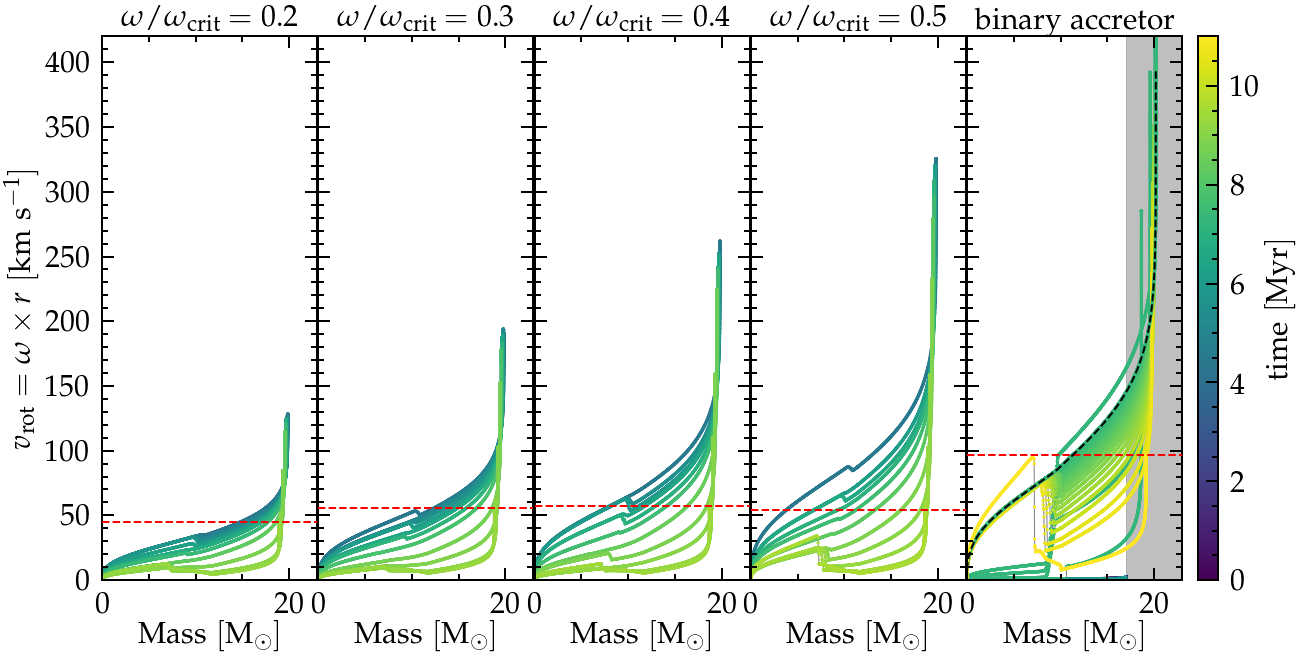

In [45]:
# internal rotation rate
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(120, 155)

ax1 = fig.add_subplot(gs[:,:30])
ax2 = fig.add_subplot(gs[:,30:60])
ax3 = fig.add_subplot(gs[:, 60:90])
ax4 = fig.add_subplot(gs[:, 90:120])
ax5 = fig.add_subplot(gs[:, 120:150])

cax = fig.add_subplot(gs[:, 152:])

ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])
ax5.set_yticklabels([])


folders = [
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"]

axes = [ax1,ax2,ax3,ax4,ax5]

for ax in axes:
    ax.set_xlabel(r"$\mathrm{Mass \ [M_\odot]}$")
    ax.set_ylim(0, 420)
    ax.set_xlim(xmin=0, xmax=23)
# ax1.set_ylabel(r"$\omega \ \mathrm{[rad\ s^{-1}]}$")
ax1.set_ylabel(r"$v_\mathrm{rot} = \omega\times r \ \mathrm{[km\ s^{-1}]}$")


for folder in folders:
    ax = axes[folders.index(folder)]
    if "single" in folder:
        title = "$\omega/\omega_\mathrm{crit}="+str(folder.split('/')[-3].split('_')[1])+"$"
        profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        profiles = profiles[1:] # the first profile is before CNO equilibrium and can be confusing
        # let's plot less profiles for clarity
        profiles = profiles[::10]+[profiles[-1]]
    if "binary" in folder:
        title = "$\mathrm{binary\ accretor}$"
        ax.axvspan(17, 23, alpha=0.5, color="#808080", zorder=0)
        profiles_bin = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        # profiles_bin = profiles_bin[1:] # the first profile is during the initial relaxation, skip it
        # remove the relaxation and evolution towards CNO equilibrium for clarity
        # profiles_bin = [p for p in profiles_bin if get_age_from_profile(p)>0.2]
        profiles_sin = sorted(glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)
        # let's plot a bit less for clarity
        profiles = profiles_bin[::15]+profiles_sin[::50]
        # profiles = profiles[8:] # remove profiles before CNO equilibrium
        profiles = profiles[:len(profiles)-5] # too many profiles close to TAMS make things unreadable
        profiles = profiles + [profiles_bin[-1]] + [profiles_sin[-1]] # make sure to add last profile as binary and TAMS profiles
    ax.set_title(title, fontsize=30)
    for profile in profiles:
        src, col = getSrcCol(profile)
        m = src[:, col.index("mass")]
        omega = src[:, col.index("omega")]
        r = src[:, col.index("radius")]*Rsun_cm/1e5 # km
        vrot = omega*r
        age = get_age_from_profile(profile)
        ax.plot(m, vrot, c='#808080', lw=1, zorder=0, rasterized=True)
        p = ax.scatter(m, vrot, c=[age]*len(m), s=5, vmin=0, vmax=11, rasterized=True)
        if profile == profiles[-1]:
            ax.axhline(vrot[0],0,1, ls='--', lw=2, c='r', zorder=100, rasterized=True)
            
# highlight last profile of binary run
pfile = profiles_bin[-1]
src, col = getSrcCol(pfile)
omega = src[:, col.index("omega")]
r = src[:, col.index("radius")]*Rsun_cm/1e5 # km
vrot = omega*r    
m = src[:, col.index("mass")]
age = get_age_from_profile(profile)
ax5.plot(m, vrot, c='k', lw=2, ls='--', zorder=100)

fig.colorbar(p, cax=cax)
cax.set_ylabel(r"$\mathrm{time \ [Myr]}$")

plt.savefig("/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/zeta_Rotational_struct.pdf", rasterized=True)

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


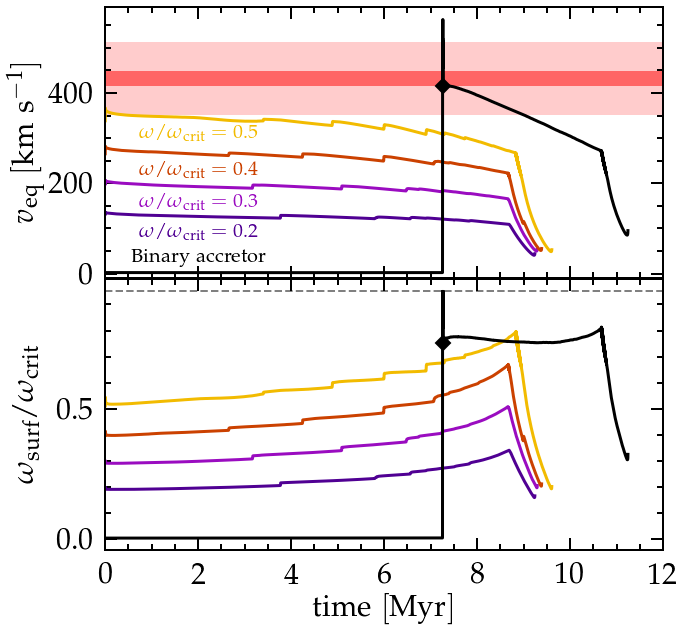

In [80]:
# surface rotation rate
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:50,:])
bx = fig.add_subplot(gs[50:,:])

# overplo single rotating stars
folders = [
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/"]
colors = plt.cm.gnuplot(np.linspace(0.1,0.9,len(folders)))
for f in folders:
    t, v = get_surface_rotation_time(f+'/history.data')
    src, col = getSrcCol(f+'history.data')
    # print(col)
    omega_div_omega_crit = src[:, col.index("surf_avg_omega_div_omega_crit")]   
    c = colors[folders.index(f)]
    ax.plot(t, v, c=c, zorder=2)
    bx.plot(t, omega_div_omega_crit, c=c, zorder=2)
    ax.text(2, v[np.argmin(np.absolute(t-2))]-20,
            "$\omega/\omega_\mathrm{crit}="+str(f.split('/')[-3].split('_')[1])+"$",
            va="top", ha="center", color=c, fontsize=20) #, bbox=dict(facecolor='w', edgecolor=c, boxstyle='round,pad=0'))


plot_surface_rotation_time(ax, hfile1, c='k', hfile2=hfile2) #, label="Z=0.01")
# t, v = get_surface_rotation_time(hfile1)
src, col = getSrcCol(hfile1)
omega_div_omega_crit = src[:, col.index("surf_avg_omega_div_omega_crit")]

t = src[:, col.index("star_age")]*1e-6
bx.plot(t, omega_div_omega_crit, c='k', zorder=2)
src, col = getSrcCol(hfile2)
omega_div_omega_crit = src[:, col.index("surf_avg_omega_div_omega_crit")]
t = src[:, col.index("star_age")]*1e-6
bx.plot(t, omega_div_omega_crit, c='k', zorder=2)
bx.plot(t[0], omega_div_omega_crit[0], 'kD', ms=10, zorder=2)

# modnum = src[:, col.index("model_number")]
# ax.scatter(t, v, c=modnum, zorder=2, vmin=vmin, vmax=vmax)
# t, v = get_surface_rotation_time(hfile2)
# src, col = getSrcCol(hfile2)
# modnum = src[:, col.index("model_number")]

# ax.scatter(t, v, c=modnum, zorder=2, vmin=vmin, vmax=vmax)
# ax.plot(np.nan, np.nan,c='k', ls="-.", label="$\mathrm{accretor}$")
# overplot observational range
vsini, err_vsini = get_zeta_oph_vsini()
bx.set_xlim(0, 12)
ax.set_xlim(bx.get_xlim())
xmin, xmax = bx.get_xlim()
ax.fill_between(np.linspace(xmin, xmax,2), [vsini-err_vsini], [vsini+err_vsini], facecolor='r', alpha=0.5, zorder=1)
ax.fill_between(np.linspace(xmin, xmax,2), [vsini-5*err_vsini], [vsini+5*err_vsini], facecolor='r', alpha=0.2, zorder=1)
# ax.legend(loc="center right", fontsize=30)
bx.set_xlabel(r"$\mathrm{time \ [Myr]}$")
ax.set_xticklabels([])
#bx.set_ylim(0,1)
ax.set_ylim(ymin=-10)
bx.axhline(0.95,0,1, ls='--', lw=2, zorder=0, c='#808080')
# ax.set_xlim(xmin=8)
# ax.set_ylim(ymin=200)
ax.set_ylabel(r"$v_\mathrm{eq} \ \mathrm{[km\ s^{-1}]}$")
bx.set_ylabel(r"$\omega_\mathrm{surf}/\omega_\mathrm{crit}$")
ax.text(2, 15, r"$\mathrm{Binary\ accretor}$", fontsize=20, c='k', va="bottom", ha="center")
fig.align_labels()


plt.savefig("/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/zeta_rot.pdf")


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


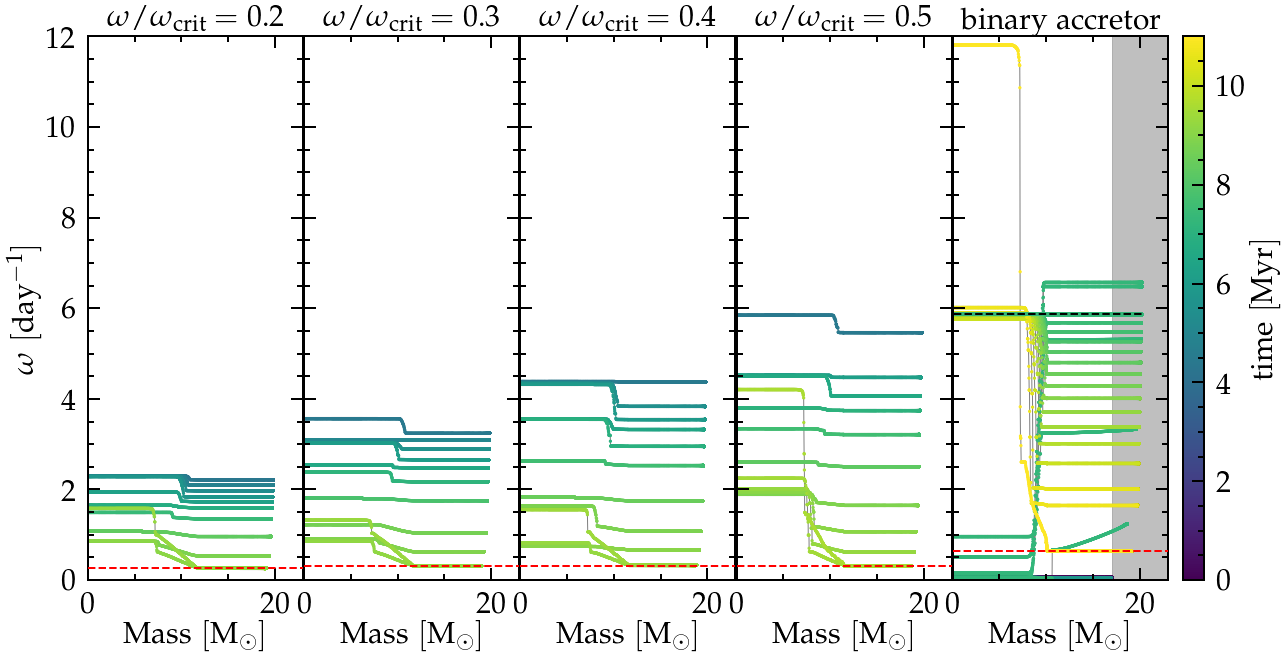

In [55]:
# omega profile
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(120, 155)

ax1 = fig.add_subplot(gs[:,:30])
ax2 = fig.add_subplot(gs[:,30:60])
ax3 = fig.add_subplot(gs[:, 60:90])
ax4 = fig.add_subplot(gs[:, 90:120])
ax5 = fig.add_subplot(gs[:, 120:150])

cax = fig.add_subplot(gs[:, 152:])

ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])
ax5.set_yticklabels([])


folders = [
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"]

axes = [ax1,ax2,ax3,ax4, ax5]

for ax in axes:
    ax.set_xlabel(r"$\mathrm{Mass \ [M_\odot]}$")
    ax.set_ylim(0, 12)
    ax.set_xlim(xmin=0, xmax=23)
# ax1.set_ylabel(r"$\omega \ \mathrm{[rad\ s^{-1}]}$")
ax1.set_ylabel(r"$\omega\ \mathrm{[day^{-1}]}$")


for folder in folders:
    ax = axes[folders.index(folder)]
    if "single" in folder:
        title = "$\omega/\omega_\mathrm{crit}="+str(folder.split('/')[-3].split('_')[1])+"$"
        profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        profiles = profiles[1:] # the first profile is before CNO equilibrium and can be confusing
        # let's plot less profiles for clarity
        profiles = profiles[::10]+[profiles[-1]]
    if "binary" in folder:
        title = "$\mathrm{binary\ accretor}$"
        ax.axvspan(17, 23, alpha=0.5, color="#808080", zorder=0)
        profiles_bin = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        # profiles_bin = profiles_bin[1:] # the first profile is during the initial relaxation, skip it
        # remove the relaxation and evolution towards CNO equilibrium for clarity
        # profiles_bin = [p for p in profiles_bin if get_age_from_profile(p)>0.2]
        profiles_sin = sorted(glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)
        # let's plot a bit less for clarity
        profiles = profiles_bin[::15]+profiles_sin[::50]
        # profiles = profiles[8:] # remove profiles before CNO equilibrium
        profiles = profiles[:len(profiles)-5] # too many profiles close to TAMS make things unreadable
        profiles = profiles + [profiles_bin[-1]] + [profiles_sin[-1]] # make sure to add last profile as binary and TAMS profiles
    ax.set_title(title, fontsize=30)
    for profile in profiles:
        src, col = getSrcCol(profile)
        m = src[:, col.index("mass")]
        omega = src[:, col.index("omega")]*60*60*24
        # r = src[:, col.index("radius")]*Rsun_cm/1e5 # km
        # vrot = omega*r
        age = get_age_from_profile(profile)
        ax.plot(m, omega, c='#808080', lw=1, zorder=0, rasterized=True)
        p = ax.scatter(m, omega, c=[age]*len(m), s=5, vmin=0, vmax=11, rasterized=True)
        if profile == profiles[-1]:
            ax.axhline(omega[0],0,1, ls='--', lw=2, c='r', zorder=100, rasterized=True)

# highlight last profile of binary run
pfile = profiles_bin[-1]
src, col = getSrcCol(pfile)
omega = src[:, col.index("omega")]*60*60*24
r = src[:, col.index("radius")]*Rsun_cm/1e5 # km
m = src[:, col.index("mass")]
ax5.plot(m, omega, c='k', lw=2, ls='--', zorder=100)

fig.colorbar(p, cax=cax)
cax.set_ylabel(r"$\mathrm{time \ [Myr]}$")
plt.savefig("/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/omega_struct.pdf", rasterized=True)

In [73]:
# how long is rigid rotation lasting
def how_long_rigid(folder, tolerance=0.1):
    """
    given the folder where profiles for the binary are saved and the tolerance we accept for "rigid" in cycles/days
    returns the duration of the phase when max(omega)-min(omega) is within the tolerance, i.e. how long the accretor is rigidly rotating.
    """
    profiles_bin = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
    profiles_sin = sorted(glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)
    # let's plot a bit less for clarity
    profiles = profiles_bin+profiles_sin
    # remove the pre-RLOF evolution -- the model is initialized as rigid rotators and we don't want to catch that
    profiles = [p for p in profiles if get_age_from_profile(p)> 7.2 ]
    t_start_rigid = -1
    t_end_rigid = t_start_rigid
    for profile in profiles:
        src, col = getSrcCol(profile)
        omega = src[:, col.index("omega")]*60*60*24
        if t_start_rigid == -1:
            if max(omega)-min(omega) <= tolerance:
                t_start_rigid = get_age_from_profile(profile)
                print("found t_start_rigid", t_start_rigid)
        else:
            # if here, we have t_start_rigid
            if max(omega)-min(omega) > tolerance:
                t_end_rigid = get_age_from_profile(profile)
                print("found t_end_rigid", t_end_rigid)
                break # found the end
    return t_end_rigid - t_start_rigid # in Myrs


folder="/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"
print(how_long_rigid(folder), "Myrs")

found t_start_rigid 7.242478650562316
found t_end_rigid 7.253554318324493
0.011075667762177055 Myrs


In [ ]:
# Hunter diagram

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(120, 155)

ax = fig.add_subplot(gs[:, :])
ax.set_ylabel(r"$X(^{14}\mathrm{N})$")
ax.set_xlabel(r"$v_\mathrm{eq} \ \mathrm{[km\ s^{-1}]}$")

folders = [
    # "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/non_rot/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"]

colors = plt.cm.viridis(np.linspace(0,0.9,len(folders)-1))
# ax.set_ylim(ymax=9e-3, ymin=4e-4)
ax.set_ylim(ymax=7e-3, ymin=4e-4)
ax.set_xlim(0, 600)    

for folder in folders:
    if "single" in folder:
        label = "$\omega/\omega_\mathrm{crit}="+str(folder.split('/')[-3].split('_')[1])+"$"
        c = colors[folders.index(folder)] 
        src, col = getSrcCol(folder+"/history.data")
        n14 = src[:, col.index("surface_n14")]
        vrot = src[:, col.index("surf_avg_v_rot")]
        ax.plot(vrot, n14, c=c, label=label)
    if "binary" in folder:
        label = "$\mathrm{binary\ accretor}$"
        c = 'k'
        src, col = getSrcCol(folder+"/history.data")
        n14_1 = src[:, col.index("surface_n14")]
        vrot_1 = src[:, col.index("surf_avg_v_rot")]
        ax.plot(vrot_1, n14_1, c=c)
        # src, col = getSrcCol(folder+"../binary_history.data")
        # rl_relative_gap_1 = src[:, col.index("rl_relative_overflow_1")]
        # ind = rl_relative_gap_1 > 0
        # ax.plot(vrot_1[ind], n14_1[ind], c='r', ms=10, zorder=100)
        # now plot post-RLOF
        src, col = getSrcCol(folder+"/../../accretor_to_TAMS/LOGS/history.data")
        n14_2 = src[:, col.index("surface_n14")]
        vrot_2 = src[:, col.index("surf_avg_v_rot")]       
        ax.plot(vrot_2, n14_2, c=c,ls='-.', label=label)

        
# n, err_n =  get_zeta_oph_surface_n()
# ax.axhline(n, 0,1,c='r', lw=2)
# xmin, xmax = ax.get_xlim()
# x = np.linspace(xmin, xmax, 3)
# ax.fill_between(x, y1=n-err_n, y2=n+err_n, fc='r',alpha=0.2)

ax.legend()
# ax.set_yscale('log')
# plt.savefig("/mnt/home/mrenzo/TMP/hunter_zeta.pdf")

# diffusion coefficients across the evolution

In [ ]:
# find profile numbers
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:, :])

L, Teff = getlogLlogTeff(hfile1)
src, col = getSrcCol(hfile1)
t = src[:, col.index('star_age')]
modnum = src[:, col.index('model_number')]
time = src[:, col.index("star_age")]*1e-6

L2, Teff2 = getlogLlogTeff(hfile2)
src, col = getSrcCol(hfile2)
modnum2 = src[:, col.index('model_number')]
time2 = src[:, col.index("star_age")]*1e-6

L = np.concatenate((L, L2))
Teff = np.concatenate((Teff, Teff2))
modnum = np.concatenate((modnum, modnum2))
time = np.concatenate((time, time2))

ind = modnum >-1 #(modnum > 3000) & (modnum < 6000)


p = ax.scatter(Teff[ind], L[ind], c=modnum[ind], s=100,zorder=1000) #, vmin=0, vmax=8200)
fig.colorbar(p)
ax.invert_xaxis()
# ax.plot(modnum, time)

# ax.set_ylim(0, 2.72)



In [ ]:
# small plots for movie
root = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/"
LOGS = root+"binary_to_postRLOF/LOGS2/"
LOGS_single = root+"accretor_to_TAMS/LOGS/" 

profiles_bin = sorted(glob.glob(LOGS+'/profile*.data'), key=get_age_from_profile)
profiles_single = sorted(glob.glob(LOGS_single+'/profile*.data'), key=get_age_from_profile)
profiles = profiles_bin+profiles_single

def wrapper(p):
    # set_plotDefaults()
    plt.ioff() # no interactive plots
    fig = plt.figure(figsize=(12,12))
    gs = gridspec.GridSpec(100,100)
    ax = fig.add_subplot(gs[:, :])
    plot_Dmix(p, ax=ax, legend=True)    
    ax.set_xlabel(r"$\mathrm{Mass \ } [M_\odot]$")
    ax.set_ylim(10**0, 10**18)
    ax.set_xlim(xmin=0, xmax=21)
    ax.set_ylabel(r"$D \ \mathrm{[cm^2\ s^{-1}]}$")
    ax.axvspan(17, 21, alpha=0.5, color="#808080", zorder=0)
    ax.set_yticks([100, 1000, 1e4, 1e5, 1e6, 1e7,1e8,1e9,1e10,1e11,1e12,1e13,1e14, 1e15, 1e16,1e17], minor=True)
    ax.set_yticklabels([], minor=True)
    # ax.set_title(p.split('/')[-1], fontsize=30)
    # plt.tight_layout()
    plt.savefig(root+'/mix_plots/mix_'+f'{profiles.index(p):04.0f}'+'.png')
    # plt.close()

# # serial
for p in profiles_bin:
    wrapper(p)
for p in profiles_single:
    wrapper(p)
    
# # parallel
# Parallel(n_jobs=19)(delayed(wrapper)(p) for p in profiles)

# test
# wrapper(profiles_single[1])

In [ ]:
# D_mix vertical
fig = plt.figure(figsize=(10,25))
gs = gridspec.GridSpec(150, 100)
ax5 = fig.add_subplot(gs[:30, :])
ax4 = fig.add_subplot(gs[30:60, :])
ax3 = fig.add_subplot(gs[60:90, :])
ax2 = fig.add_subplot(gs[90:120, :])
ax1 = fig.add_subplot(gs[120:, :])

axes = [ax1, ax2, ax3, ax4, ax5]

root = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/"

LOGS = root+"binary_to_postRLOF/LOGS2/"
LOGS_single = root+"accretor_to_TAMS/LOGS/" 

profiles =  [LOGS+"profile10.data",
             LOGS+"profile78.data",
             LOGS+"profile131.data",
             LOGS_single+"profile496.data",
             LOGS_single+"profile893.data"]

# revert order to get from top to bottom
profiles = profiles[::-1]

for pfile in profiles:
    legend = False
    ax_to_use = axes[profiles.index(pfile)]
    if ax_to_use == ax5:
        legend = True
    plot_Dmix(pfile, ax=ax_to_use, legend=legend)    

# beautification
ax1.set_xlabel(r"$\mathrm{Mass}\ [M_\odot]$")
# ax1.set_ylim(-1,18)
ax1.set_ylim(10**1, 10**18)
# ax3.set_ylabel(r"$\log_{10}(D / \mathrm{[cm^2\ s^{-1}]})$")
for ax in axes:
    if ax != ax1:
        ax.set_xticklabels([])
    ax.set_ylim(ax1.get_ylim())
    ax.set_xlim(xmin=0, xmax=20.5)
    ax.set_ylabel(r"$D \ \mathrm{[cm^2\ s^{-1}]}$")
    ax.axvspan(17, 20.5, alpha=0.5, color="#808080", zorder=0)
    ax.set_yticks([100, 1000, 1e4, 1e5, 1e6, 1e7,1e8,1e9,1e10,1e11,1e12,1e13,1e14, 1e15, 1e16,1e17], minor=True)
    ax.set_yticklabels([], minor=True)
 

    
# legend
# ax5.legend(loc='lower left', bbox_to_anchor= (0, 1.01), ncol=3,
#            borderaxespad=0, frameon=False, handletextpad=0.1)

# conv, = ax5.plot(np.nan, np.nan, lw=30, ls='-', c='r',label="$\mathrm{Convection}$")
# ov, = ax5.plot(np.nan, np.nan, lw=30, ls='-', c='b',label="$\mathrm{Overshooting}$")
# rot, = ax5.plot(np.nan, np.nan, lw=30, ls='-', c='c',label="$\mathrm{Rotation}$")
# thrm, = ax5.plot(np.nan, np.nan, lw=30, ls='-', c='#CC99BB',label="$\mathrm{Thermohaline}$")
# semiconv, = ax5.plot(np.nan, np.nan, lw=30, ls='-', c='#AA4488',label="$\mathrm{Semiconvection}$")
# ax5.legend(handles=[rot, ov, conv, semiconv, thrm], loc='lower left', bbox_to_anchor= (0, 1.01), ncol=2,
#             borderaxespad=0, frameon=False, handlelength=0.5)

    
# fig.savefig('/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/D_mix_vertical.pdf')
    


In [ ]:
def plot_Dmix_radius(pfile, ax=""):
    if ax == "":
        fig = plt.figure(figsize=(10,10))
        gs = gridspec.GridSpec(100, 100)
        ax = fig.add_subplot(gs[:, :])

    age = get_age_from_profile(pfile)
    title = f"{age:.2f}"+r"\,\mathrm{Myr}$"
        
    src, col = getSrcCol(pfile)
    r = src[:, col.index("radius")]
    log_D_mix = src[:, col.index('log_D_mix')]
    log_D_mix_non_rotation = src[:, col.index('log_D_mix_non_rotation')]
    log_D_conv = src[:, col.index('log_D_conv')]
    log_D_semi = src[:, col.index('log_D_semi')]
    log_D_thrm = src[:, col.index('log_D_thrm')]
    
    ax.plot(r, log_D_mix, lw=10, label="$\mathrm{Total}$", c="c")
    ax.plot(r, log_D_mix_non_rotation, label="$\mathrm{Excluding\ rotation}$", c='b')
    ax.plot(r, log_D_conv, label="$\mathrm{Convection}$", c="r")
    ax.plot(r, log_D_semi, label="$\mathrm{Semiconvection}$", c="m")
    ax.plot(r, log_D_thrm, label="$\mathrm{Thermohaline}$", c="#CC99BB")
    # ax.legend()
    # ax.set_title(title, fontsize=30)
    ax.text(0.5,0.92, title, fontsize=30, va="center", ha="center", transform=ax.transAxes)


In [ ]:
root = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/"

LOGS = root+"binary_to_postRLOF/LOGS2/"
LOGS_single = root+"accretor_to_TAMS/LOGS/" 

profiles =  [LOGS+'/profile31.data',  # model_number = 1500
             LOGS+'/profile81.data',  # model_number = 4000
             LOGS+'/profile111.data', # model_number = 5500
             LOGS_single+'/profile11.data']

fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(120, 100)
ax1 = fig.add_subplot(gs[:100, :25])
ax2 = fig.add_subplot(gs[:100, 25:50])
ax3 = fig.add_subplot(gs[:100, 50:75])
ax4 = fig.add_subplot(gs[:100, 75:])
# ax_legend = fig.add_subplot(gs[100:,:])

axes = [ax1, ax2, ax3,ax4]
ax1.set_ylabel(r"$\log_{10}(D / \mathrm{[cm^2\ s^{-1}]})$")
ax1.set_ylim(-5,18)
for ax in axes:
    if ax != ax1:
        ax.set_yticklabels([])
    ax.set_ylim(ax1.get_ylim())
    ax.set_xlabel(r"$\mathrm{Mass \ } [M_\odot]$")
    ax.set_xlim(xmin=0, xmax=22.5)
    ax.axvspan(17, 22.5, alpha=0.5, color="#808080", zorder=0)


for pfile in profiles:
    plot_Dmix(pfile, ax=axes[profiles.index(pfile)])    

ax1.legend(loc='lower left', bbox_to_anchor= (0, 1.01), ncol=3,
            borderaxespad=0, frameon=False)



fig.savefig('/mnt/home/mrenzo/Templates/zeta_oph/manuscript/figures/D_mix.pdf')

# sanity checks

In [ ]:
# Hunter diagram for 13Msun Z=Z_LMC=0.0047
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.0047/13/rot_0.4_crit/LOGS/"

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(120, 155)
ax = fig.add_subplot(gs[:, :])

ax.set_ylabel(r"$X(^{14}\mathrm{N})$")
ax.set_xlabel(r"$v_\mathrm{rot} \ \mathrm{[km\ s^{-1}]}$")


src, col = getSrcCol(folder+"/history.data")
n14 = src[:, col.index("surface_n14")]
vrot = src[:, col.index("surf_avg_v_rot")]


label = "13Msun, Z=0.0047"
ax.plot(vrot, n14, c='b', label=label)
    

In [ ]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(120, 120)
ax = fig.add_subplot(gs[:,:])

for folder in folders:
    hfile = folder+'history.data'
    src, col = getSrcCol(hfile)
    L = src[:, col.index("log_L")]
    Teff = src[:, col.index("log_Teff")]
    mn = src[:, col.index("model_number")]
    if "binary" not in folder:
        ax.plot(Teff, L, label=folder.split('/')[-3].replace('_',' '))
    else:
        p = ax.scatter(Teff, L, c=mn)
fig.colorbar(p)
ax.invert_xaxis()
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/\mathrm{[K]})$")
ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")
ax.legend()

# ===============================================================================

In [ ]:
# play with Geneva model
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])


file_geneva = "../data/geneva_models/M020Z14V4.dat"
src = np.genfromtxt(file_geneva, skip_header=2)
with open(file_geneva, "r") as f:
    for i, line in enumerate(f):
        if i==0:
            col = line.split()
            print(col)
        break
c12_surf = src[:, col.index('12C_surf')]
n14_surf = src[:, col.index('14N_surf')]
o16_surf = src[:, col.index('16O_surf')]
t = src[:, col.index('time')]*1e-6


x = np.log10(n14_surf/o16_surf)
y = np.log10(n14_surf/c12_surf)

p = ax.scatter(x, y, c=t)


# now non-rotating
file_geneva = "../data/geneva_models/M020Z14V0.dat"
src = np.genfromtxt(file_geneva, skip_header=2)
with open(file_geneva, "r") as f:
    for i, line in enumerate(f):
        if i==0:
            col = line.split()
            print(col)
        break
c12_surf = src[:, col.index('12C_surf')]
n14_surf = src[:, col.index('14N_surf')]
o16_surf = src[:, col.index('16O_surf')]
t = src[:, col.index('time')]*1e-6

x = np.log10(n14_surf/o16_surf)
y = np.log10(n14_surf/c12_surf)

# ax.scatter(x, y, label="20, 0 geneva", c=t)
ax.plot(x, y, c='r', ls='--')
fig.colorbar(p, label="$\mathrm{time\ [Myr]}$")
ax.set_xlabel(r"$\log_{10}(X(^{14}\mathrm{N})/X(^{16}\mathrm{O}))$")
ax.set_ylabel(r"$\log_{10}(X(^{14}\mathrm{N})/X(^{12}\mathrm{C}))$")

In [ ]:
# surface abundances evolution
# inspired by Fig. 8 in Bouret et al. 2021
# but we use mass fractions not number fractions
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

src1, col1 = getSrcCol(hfile1)
src2, col2 = getSrcCol(hfile2)

mass = np.concatenate((src1[:, col1.index("star_mass")], src2[:, col2.index("star_mass")]))
time = np.concatenate((src1[:, col1.index("star_age")], src2[:, col2.index("star_age")]))*1e-6

src, col = getSrcCol(bfile)
rl_relative_gap_1 = src[:, col.index("rl_relative_overflow_1")]
ind = rl_relative_gap_1 > 0
t_RLOF = src[ind, col.index("age")]*1e-6
RLOF_init = min(t_RLOF)
RLOF_end = max(t_RLOF)

# get surface CNO mass fraction
surface_n14 = np.concatenate((src1[:, col1.index("surface_n14")], src2[:, col2.index("surface_n14")]))
surface_c12 = np.concatenate((src1[:, col1.index("surface_c12")], src2[:, col2.index("surface_c12")]))
surface_o16 = np.concatenate((src1[:, col1.index("surface_o16")], src2[:, col2.index("surface_o16")]))
# surface_h = np.concatenate((src1[:, col1.index("surface_h1")], src2[:, col2.index("surface_h1")]))

log_N_div_O = np.log10(surface_n14/surface_o16)
log_N_div_C = np.log10(surface_n14/surface_c12)

ax.plot(10**log_N_div_O, 10**log_N_div_C, c='m')
ax.scatter(10**log_N_div_O[(time>RLOF_init) & (time< RLOF_end)], 10**log_N_div_C[(time>RLOF_init) & (time< RLOF_end)],c=time[(time>RLOF_init) & (time< RLOF_end)], edgecolor='k',label=r"accretor", vmin=0, vmax=max(time))

# add zeta Ophiuchi
c, err_c = get_zeta_oph_surface_c()
o, err_o = get_zeta_oph_surface_o()
n, err_n =  get_zeta_oph_surface_n()

n_div_c = n/c
err_n_div_c = (err_n/n +err_c/c)*n_div_c
log_n_div_c = np.log10(n_div_c)
err_log_n_div_c = err_n_div_c/(n_div_c*np.log(10))



n_div_o = n/o
err_n_div_o = (err_n/n +err_o/o)*n_div_o
log_n_div_o = np.log10(n_div_o)
err_log_n_div_o = err_n_div_o/(n_div_o*np.log(10))

#ax.errorbar(10**log_n_div_o, 10**log_n_div_c, xerr=[err_log_n_div_o], yerr=[err_log_n_div_c], c='r', marker='o')


# --------------------------------------------------------------------
# overplot single star models

# non-rotating
src, col = getSrcCol('/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/non_rot/LOGS/history.data')
surface_n14 = src[:, col.index("surface_n14")]
surface_c12 = src[:, col.index("surface_c12")]
surface_o16 = src[:, col.index("surface_o16")]
# surface_h = src[:, col.index("surface_h1")]

log_N_div_O = np.log10(surface_n14/surface_o16)
log_N_div_C = np.log10(surface_n14/surface_c12)

ax.plot(10**log_N_div_O, 10**log_N_div_C, c='b', ls='--', lw=5, label="MESA 0")

# rotating
src, col = getSrcCol('/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/history.data')
surface_n14 = src[:, col.index("surface_n14")]
surface_c12 = src[:, col.index("surface_c12")]
surface_o16 = src[:, col.index("surface_o16")]
# surface_h = src[:, col.index("surface_h1")]

log_N_div_O = np.log10(surface_n14/surface_o16)
log_N_div_C = np.log10(surface_n14/surface_c12)

ax.plot(10**log_N_div_O, 10**log_N_div_C, c='b', ls='-', label="MESA 0.4")

# --------------------------------------------------------------------
# # overplot geneva model
# file_geneva = "../data/geneva_models/M020Z14V4.dat"
# src = np.genfromtxt(file_geneva, skip_header=2)
# with open(file_geneva, "r") as f:
#     for i, line in enumerate(f):
#         if i==0:
#             col = line.split()
#             print(col)
#         break
# c12_surf = src[:, col.index('12C_surf')]
# n14_surf = src[:, col.index('14N_surf')]
# o16_surf = src[:, col.index('16O_surf')]


# x = np.log10(n14_surf/o16_surf)
# y = np.log10(n14_surf/c12_surf)
# ax.plot(x, y, label="20, 0.4 geneva", zorder=0, c='k')

# # over plot geneva model non-rotating
# file_geneva = "../data/geneva_models/M020Z14V0.dat"
# src = np.genfromtxt(file_geneva, skip_header=2)
# with open(file_geneva, "r") as f:
#     for i, line in enumerate(f):
#         if i==0:
#             col = line.split()
#             print(col)
#         break
# c12_surf = src[:, col.index('12C_surf')]
# n14_surf = src[:, col.index('14N_surf')]
# o16_surf = src[:, col.index('16O_surf')]

# x = np.log10(n14_surf/o16_surf)
# y = np.log10(n14_surf/c12_surf)
# ax.plot(x, y, label="20, 0 geneva", zorder=0, c='k', ls='--', lw=5)
# --------------------------------------------------------------------

ax.set_xlabel(r"$\log_{10}(X(^{14}\mathrm{N})/X(^{16}\mathrm{O}))$")
ax.set_ylabel(r"$\log_{10}(X(^{14}\mathrm{N})/X(^{12}\mathrm{C}))$")
ax.legend(frameon=True, loc="lower right", fontsize=20)
# fig.colorbar(p, label="$\mathrm{time\ [Myr]}$")
ax.set_xlim(0,0.5)
ax.set_ylim(0,3)


In [ ]:
# N profiles in time
#folder = LOGS2
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/"

profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
print(profiles)
# find min and max age
# min_age = 1e99
# max_age = -1e99
# for profile in profiles:
#     age = get_age_from_profile(profile)
#     if age < min_age:
#         min_age = age
#     if age> max_age:
#         max_age = age
# print(min_age, max_age)

min_mn = 1e99
max_mn = -1e99
for profile in profiles:
    mn = get_modnum_from_profile(profile)
    if mn < min_mn:
        min_mn = mn
    if mn> max_mn:
        max_mn = mn
print(min_mn, max_mn)


color_array = np.linspace(0,max_mn,len(profiles))
cmap = plt.cm.viridis(color_array)


fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

for profile in profiles:
    src, col = getSrcCol(profile)
    n = src[:, col.index("n14")]
    m = src[:, col.index("mass")]
    modnum = get_modnum_from_profile(profile)
    # i = np.argmin(np.absolute(color_array-modnum))
    # ax.plot(m, n, lw=3, c=cmap[i])
    p = ax.scatter(m,n, c=[modnum]*len(n), vmin=min_mn, vmax=max_mn)


fig.colorbar(p)

ax.axvline(17, 0, 1, lw=1, ls='--', c='k', zorder=0)
ZAMS_n14 = get_ZAMS_n14(hfile1)
ax.axhline(ZAMS_n14, 0, 1, lw=1, ls='--', c='r', zorder=0)
ax.set_xlabel(r"$\mathrm{Mass \ [M_\odot]}$")
ax.set_ylabel(r"$X(^{14}\mathrm{N})$")

ax.set_yscale('log')
#ax.set_ylim(1e-, 1e-2)
ax.set_xlim(0, 21)

In [ ]:
profiles = sorted(glob.glob(LOGS2+"/p*data"), key=get_modnum_from_profile)[1:]
modnums = []
for profile in profiles:
    mn = get_modnum_from_profile(profile)
    modnums.append(mn)

cmap = plt.cm.viridis(np.linspace(0,max_mn+1,10000))

fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

ax.scatter(np.random.random(len(profiles)), np.random.random(len(profiles)), c=modnums)


In [ ]:
def convert_mass_fraction_to_number_fraction(X, A, M):
    """
    converts the mass fraction of an element into its number fraction
    X = input mass fraction
    A = atomic weight of the element
    M = total mass of the star in solar masses
    """
    mp = 1.67262192369e-24# proton mass in grams
    dq_surf = 1e-8  # the default in MESA is to average surface abundances over dq=1d-8, see surface_avg_abundance_dq
    M_surf = dq_surf*M*Msun
    N = M_surf*X/(A*mp)
    return N
